In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open("academy_monthly_desktop_201507-202310.json", "r") as desktop_file:
    desktop_data = json.load(desktop_file)

with open("academy_monthly_mobile_201507-202310.json", "r") as mobile_file:
    mobile_data = json.load(mobile_file)

In [3]:
df_desktop = pd.DataFrame(desktop_data)
df_mobile = pd.DataFrame(mobile_data)

In [4]:
df_desktop.head()

,12 Years a Slave (film),1917 (2019 film),20 Feet from Stardom,"20,000 Leagues Under the Sea (1954 film)",2001: A Space Odyssey (film),49th Parallel (film),7 Faces of Dr. Lao,7th Heaven (1927 film),8 Mile (film),8½,...,Yentl (film),"Yesterday, Today and Tomorrow",You Can't Take It with You (film),You Don't Have to Die,You Light Up My Life (film),Young at Heart (1987 film),Z (1969 film),Zero Dark Thirty,Zootopia,Zorba the Greek (film)
201507,62693,NaN,7662,9156,74520,1819,1888,1400,38469,14134,...,5982,2508,541,121,955,87,7530,53855,41724,10237
201508,58902,NaN,7635,9102,72779,1901,1650,1455,51147,14989,...,5423,9786,1492,125,991,78,5739,68535,50727,9517
201509,59116,NaN,7264,10040,72866,1742,1703,1313,39802,15522,...,4833,2781,1703,137,790,80,5596,70097,42823,6608
201510,65535,NaN,6464,9105,103626,1849,1463,866,35405,17184,...,5049,2287,1673,126,925,87,5685,59899,52457,7201
201511,66646,NaN,7321,9046,83352,1806,1266,914,38778,16236,...,4893,2115,2168,122,722,89,6000,53714,93484,7840


In [5]:
df_mobile.head()

,12 Years a Slave (film),1917 (2019 film),20 Feet from Stardom,"20,000 Leagues Under the Sea (1954 film)",2001: A Space Odyssey (film),49th Parallel (film),7 Faces of Dr. Lao,7th Heaven (1927 film),8 Mile (film),8½,...,Yentl (film),"Yesterday, Today and Tomorrow",You Can't Take It with You (film),You Don't Have to Die,You Light Up My Life (film),Young at Heart (1987 film),Z (1969 film),Zero Dark Thirty,Zootopia,Zorba the Greek (film)
201507,75458,NaN,4697,6914,55161,727,736,489,45477,5719,...,6847,1411,350,33,812,20,4053,48257,22595,6938
201508,64091,NaN,4498,6775,59175,866,789,598,50391,5886,...,5987,5101,886,29,1062,18,3764,86496,28557,9027
201509,53916,NaN,4016,6516,56269,738,731,616,44195,6001,...,4195,1371,858,39,518,22,3301,95130,20386,4857
201510,61688,NaN,3501,6237,107273,708,740,325,37376,7322,...,3643,1109,844,48,837,26,3228,52736,23090,4657
201511,61671,NaN,4717,6412,81635,745,625,337,52487,7066,...,3890,897,1239,38,553,22,3108,51818,44896,7077


### Maximum Average and Minimum Average

In [6]:
# Calculate the average pageviews for each article
average_mobile = df_mobile.mean()
average_desktop = df_desktop.mean()

In [7]:
# Find articles with the highest and lowest average pageviews
max_avg_mobile_article = average_mobile.idxmax()
min_avg_mobile_article = average_mobile.idxmin()
max_avg_desktop_article = average_desktop.idxmax()
min_avg_desktop_article = average_desktop.idxmin()

In [8]:
print(min_avg_mobile_article, min_avg_desktop_article)

Project Hope (film) Project Hope (film)


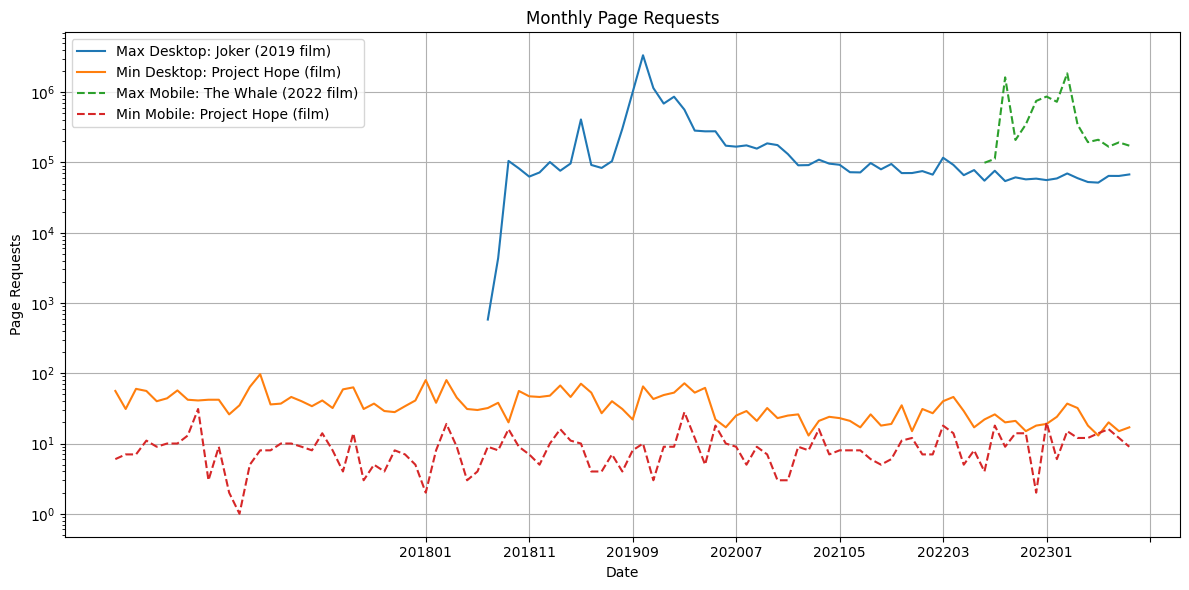

In [9]:
plt.figure(figsize=(12, 6))

# Plotting for desktop
df_desktop[max_avg_desktop_article].plot(label=f"Max Desktop: {max_avg_desktop_article}")
df_desktop[min_avg_desktop_article].plot(label=f"Min Desktop: {min_avg_desktop_article}")

# Plotting for mobile
df_mobile[max_avg_mobile_article].plot(label=f"Max Mobile: {max_avg_mobile_article}",linestyle='--')
df_mobile[min_avg_mobile_article].plot(label=f"Min Mobile: {min_avg_mobile_article}", linestyle='--')

plt.title("Monthly Page Requests")
plt.xlabel("Date")
plt.ylabel("Page Requests")
plt.legend()
plt.grid(True)
# Apply log scale to y-axis to better visualize the data
plt.yscale("log")
plt.tight_layout()
plt.savefig("max_min_avg_page_req.png")
plt.show()

### Top 10 Peak Page Views

In [10]:
peak_views_desktop = df_desktop.max()
top10_movies_desktop = peak_views_desktop.nlargest(10).index

peak_views_mobile = df_mobile.max()
top10_movies_mobile = peak_views_mobile.nlargest(10).index

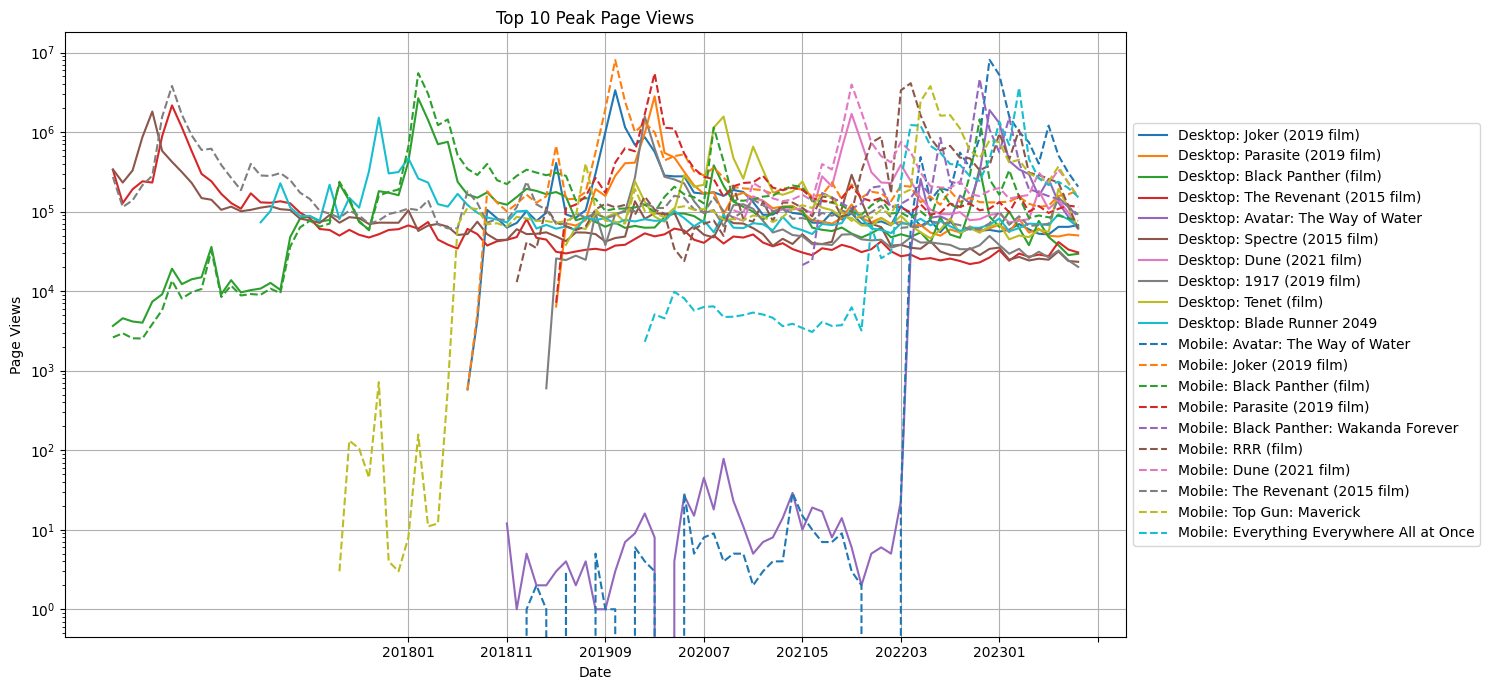

In [11]:
plt.figure(figsize=(15, 7))

# Plotting for desktop
for movie in top10_movies_desktop:
    df_desktop[movie].plot(label=f"Desktop: {movie}")

# Plotting for mobile
for movie in top10_movies_mobile:
    df_mobile[movie].plot(label=f"Mobile: {movie}", linestyle='--')

plt.title("Top 10 Peak Page Views")
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
# Apply log scale to y-axis to better visualize the data
plt.yscale("log")
plt.tight_layout()
plt.savefig("top_10_peak_page_views.png")
plt.show()


### Fewest Months of Data

In [12]:
months_count_desktop = df_desktop.count()
months_count_mobile = df_mobile.count()


fewest_data_movies_desktop = months_count_desktop.nsmallest(10).index
fewest_data_movies_mobile = months_count_mobile.nsmallest(10).index

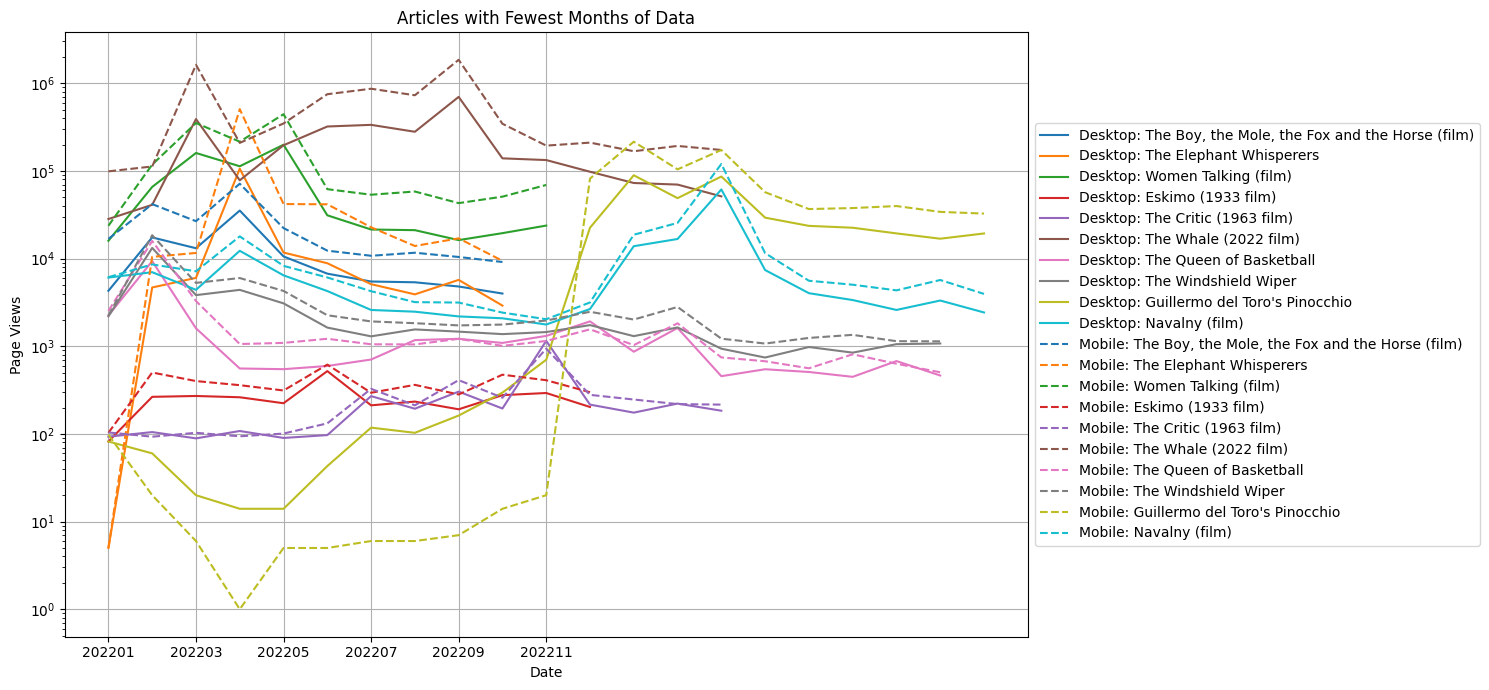

In [13]:
plt.figure(figsize=(15, 7))

# Plotting for desktop
for movie in fewest_data_movies_desktop:
    df_desktop[movie].dropna().plot(label=f"Desktop: {movie}")

# Plotting for mobile
for movie in fewest_data_movies_mobile:
    df_mobile[movie].dropna().plot(label=f"Mobile: {movie}", linestyle='--')

plt.title("Articles with Fewest Months of Data")
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
# Apply log scale to y-axis to better visualize the data
plt.yscale("log")
plt.tight_layout()
plt.savefig("fewest_months_data.png")
plt.show()